In [1]:
import pandas as pd
import scipy.stats
import statistics as stat
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,recall_score
from sklearn.model_selection import KFold

In [650]:
data = pd.read_csv('./diabetes-dataset.csv', sep = ',')

In [651]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47.0,1
1,0,84,82,31,125,38.2,0.233,23.0,0
2,0,145,0,0,0,44.2,0.630,31.0,1
3,0,135,68,42,250,42.3,0.365,24.0,1
4,1,139,62,41,480,40.7,0.536,21.0,0


In [652]:
print(data.shape)
print(data.count())
print(data.columns)
print(data.dtypes)

(2000, 9)
Pregnancies                 2000
Glucose                     2000
BloodPressure               2000
SkinThickness               2000
Insulin                     2000
BMI                         2000
DiabetesPedigreeFunction    2000
Age                         1988
Outcome                     2000
dtype: int64
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object


In [653]:
data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                         12
Outcome                      0
dtype: int64

In [654]:
print("В стобце Genre пропущено: "+ str(
    round((data['Age'].isnull().sum()/data['Age'].shape[0])*100,2))+"%")

В стобце Genre пропущено: 0.6%


In [655]:
data['Age'].mode()[0]

22.0

In [656]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

In [657]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

гистограмма недели беременности

<AxesSubplot:ylabel='Pregnancies'>

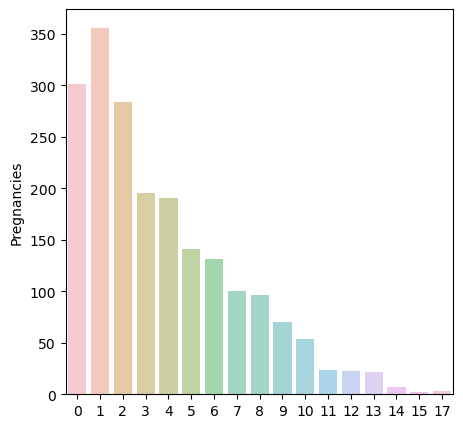

In [658]:
fg, axes = plt.subplots(figsize = (5,5))

sns.barplot(x= data['Pregnancies'].value_counts().index, 
            y = data['Pregnancies'].value_counts(), ax = axes, 
            alpha = 0.5)


<AxesSubplot:>

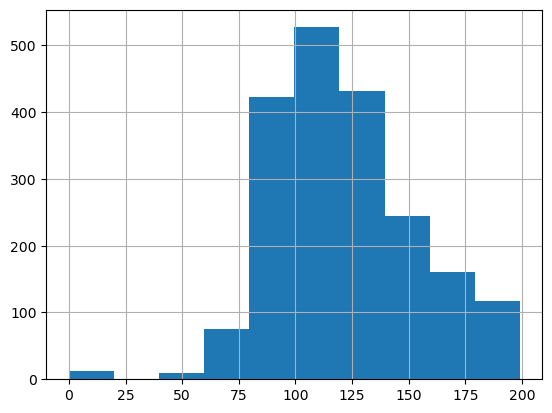

In [659]:
data['Glucose'].hist()

<AxesSubplot:>

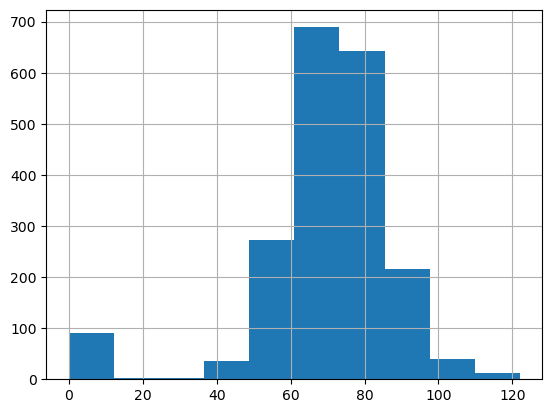

In [660]:
data['BloodPressure'].hist()

<AxesSubplot:>

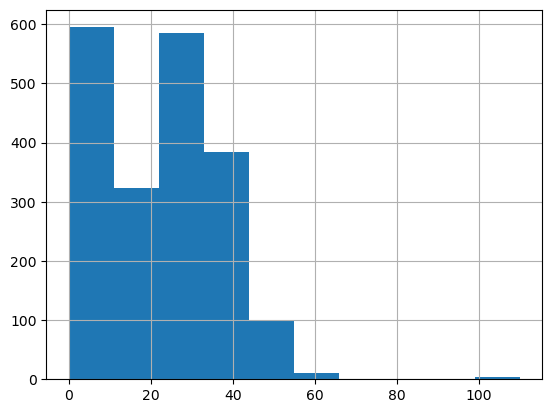

In [661]:
data['SkinThickness'].hist()

<AxesSubplot:>

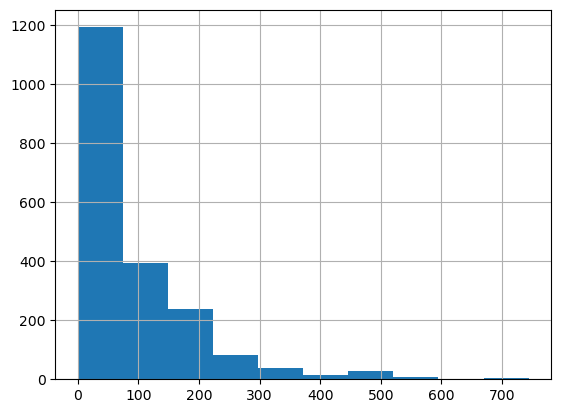

In [662]:
data['Insulin'].hist()

<AxesSubplot:>

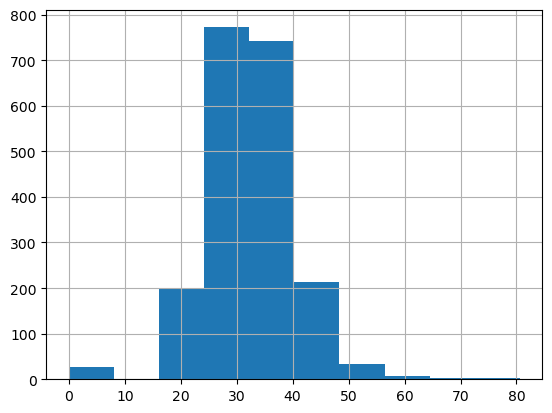

In [663]:
data['BMI'].hist()

<AxesSubplot:>

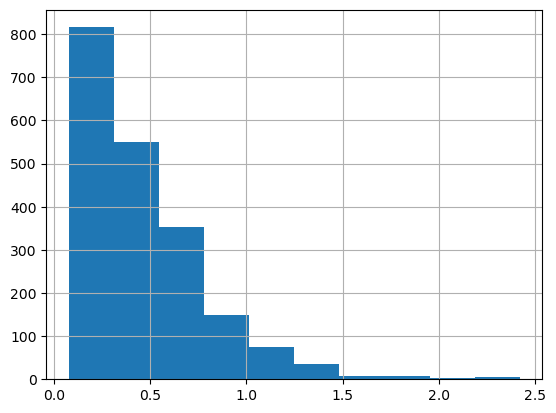

In [664]:
data['DiabetesPedigreeFunction'].hist()

<AxesSubplot:>

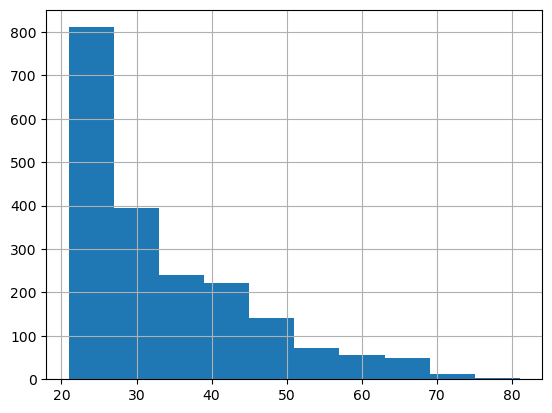

In [665]:
data['Age'].hist()

0    1316
1     684
Name: Outcome, dtype: int64


<AxesSubplot:ylabel='Outcome'>

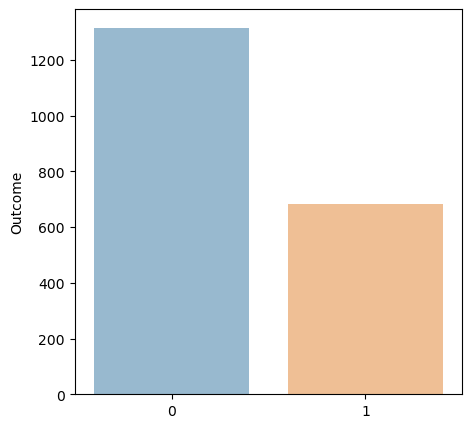

In [733]:
print(data['Outcome'].value_counts())
fg, axes = plt.subplots(figsize = (5,5))

sns.barplot(x= data['Outcome'].value_counts().index, 
            y = data['Outcome'].value_counts(), ax = axes, 
            alpha = 0.5)


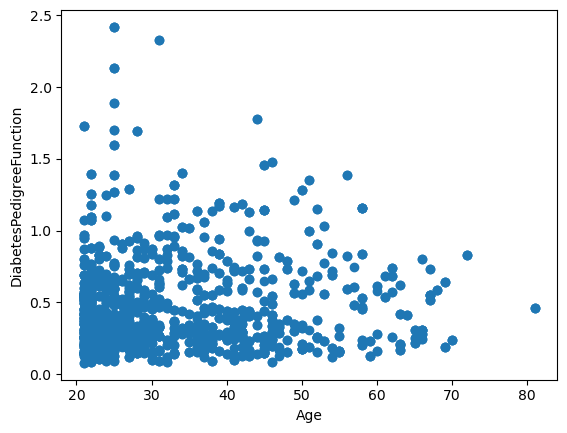

In [755]:
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.scatter(x=data['Age'], y=data['DiabetesPedigreeFunction'])

In [756]:
iqr = data['DiabetesPedigreeFunction'].quantile(0.75) - data['DiabetesPedigreeFunction'].quantile(0.25)

In [757]:
print(iqr)
q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
iqr_outlier_threshold_up = q1 + 1.5*iqr
iqr_outlier_threshold_bottom = q1 - 1.5*iqr
print(iqr_outlier_threshold_up)
print(iqr_outlier_threshold_bottom)

0.38
0.8140000000000001
-0.32600000000000007


In [758]:
data[data['DiabetesPedigreeFunction'] > iqr_outlier_threshold_up].shape

(261, 9)

In [759]:
c = data[data['DiabetesPedigreeFunction'] > iqr_outlier_threshold_up]
c = c.groupby('Outcome')
c['DiabetesPedigreeFunction'].value_counts()

Outcome  DiabetesPedigreeFunction
0        0.839                       5
         1.159                       5
         1.076                       4
         1.095                       4
         0.816                       3
                                    ..
1        1.318                       2
         1.321                       2
         1.353                       2
         1.390                       2
         1.893                       2
Name: DiabetesPedigreeFunction, Length: 94, dtype: int64

In [760]:
mean = data['DiabetesPedigreeFunction'].mean()
std = data['DiabetesPedigreeFunction'].std()
std_outlier_threshold_bottom = mean - 2.5*std
std_outlier_threshold_up = mean + 2.5*std

print("Mean: "+str(round(mean)))
print("Std: "+str(round(std)))
print("Bottom threshold: "+str(round(std_outlier_threshold_bottom)))
print("Upper threshold: "+str(round(std_outlier_threshold_up)))

Mean: 0
Std: 0
Bottom threshold: 0
Upper threshold: 1


In [738]:
vibr = data[data['DiabetesPedigreeFunction'] > iqr_outlier_threshold_up]

In [670]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47.0,1
1,0,84,82,31,125,38.2,0.233,23.0,0
2,0,145,0,0,0,44.2,0.630,31.0,1
3,0,135,68,42,250,42.3,0.365,24.0,1
4,1,139,62,41,480,40.7,0.536,21.0,0


In [671]:
iqr_no_outliers = data[data['DiabetesPedigreeFunction'] <= iqr_outlier_threshold_up]

In [761]:
print("Mean with outliers: " +str(round(data['DiabetesPedigreeFunction'].mean(),2)))
print("Mean without outliers iqr: "+str(round(iqr_no_outliers['DiabetesPedigreeFunction'].mean(),2)))


Mean with outliers: 0.47
Mean without outliers iqr: 0.37


In [764]:
healthy = len(data[(data["Age"]<25.0)&(data["Outcome"]==0)])
all_human = len(data[data["Age"]<25.0])
not_healthy = len(data[(data["Age"]<30.0)&(data["Outcome"]==1)])
print("До 25 лет с диабетом: "+str(not_healthy)+" -> "+str(round(not_healthy/all_human*100,2))+"%")
print("До 25 лет здоровы: "+str(healthy)+" -> "+str(round(healthy/all_human*100,2))+"%")

До 25 лет с диабетом: 223 -> 37.54%
До 25 лет здоровы: 504 -> 84.85%


[Text(0, 0, 'Healthy'), Text(1, 0, 'Not healthy')]

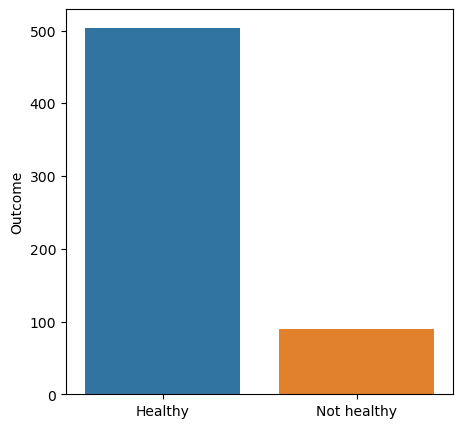

In [765]:
fig, axes = plt.subplots(figsize = (5,5))
sns.barplot(x= data[data["Age"]<25.0]["Outcome"].value_counts().index, 
            y = data[data["Age"]<25.0]["Outcome"].value_counts(), ax = axes)
axes.set_xticklabels(['Healthy', 'Not healthy'])

In [766]:
healthy = len(data[(data["Glucose"]>90)&(data["Outcome"]==0)])
all_human = len(data[data["Glucose"]>90])
not_healthy = len(data[(data["Glucose"]>90)&(data["Outcome"]==1)])
print("Глюкоза больше 90 и больные диабетом: "+str(not_healthy)+" -> "+str(round(not_healthy/all_human*100,2))+"%")
print("Глюкоза больше 90 и здоровы: "+str(healthy)+" -> "+str(round(healthy/all_human*100,2))+"%")

Глюкоза больше 90 и больные диабетом: 663 -> 38.95%
Глюкоза больше 90 и здоровы: 1039 -> 61.05%


[Text(0, 0, 'Healthy'), Text(1, 0, 'Not healthy')]

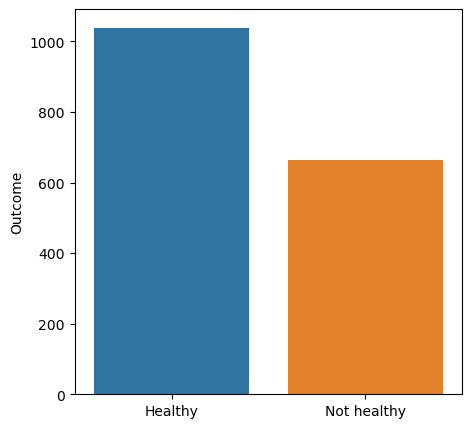

In [767]:
fig, axes = plt.subplots(figsize = (5,5))
sns.barplot(x= data[data["Glucose"]>90]["Outcome"].value_counts().index, 
            y = data[data["Glucose"]>90]["Outcome"].value_counts(), ax = axes)
axes.set_xticklabels(['Healthy', 'Not healthy'])

In [ ]:
fig, axes = plt.subplots(figsize = (5,5))
sns.barplot(x= data[data["Glucose"]>90]["Outcome"].value_counts().index, 
            y = data[data["Glucose"]>90]["Outcome"].value_counts(), ax = axes)
axes.set_xticklabels(['Healthy', 'Not healthy'])

In [677]:
data_df = data.copy()

Убираем выбросы

In [740]:
data_df = iqr_no_outliers

In [768]:
data_df['TwentyFive']=np.where(data_df["Age"]<25.0, 1, 0)
data_df['LowGlucose']=np.where(data_df["Glucose"]>90, 1, 0)


In [769]:
data_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,TwentyFive,LowGlucose
0,1,138,62,35,0,33.6,0.127,47.0,1,0,1
1,0,84,82,31,125,38.2,0.233,23.0,0,1,0
2,0,145,0,0,0,44.2,0.630,31.0,1,0,1
3,0,135,68,42,250,42.3,0.365,24.0,1,1,1
4,1,139,62,41,480,40.7,0.536,21.0,0,1,1


In [743]:
data_df['Pregnancies']=np.where(data_df["Pregnancies"]>0, 1, 0)

In [744]:
data_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,TwentyFive,LowGlucose
0,1,138,62,35,0,33.6,0.127,47.0,1,0,1
1,0,84,82,31,125,38.2,0.233,23.0,0,1,0
2,0,145,0,0,0,44.2,0.630,31.0,1,0,1
3,0,135,68,42,250,42.3,0.365,24.0,1,1,1
4,1,139,62,41,480,40.7,0.536,21.0,0,1,1


In [770]:
data_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,TwentyFive,LowGlucose
Pregnancies,1.000000,-0.012242,0.027952,-0.048223,-0.018904,-0.091921,-0.027441,0.211196,0.010110,-0.215581,-0.092332
Glucose,-0.012242,1.000000,0.140892,0.041384,0.305230,0.215732,0.031335,0.264200,0.461939,-0.195073,0.585188
BloodPressure,0.027952,0.140892,1.000000,0.180036,0.088589,0.274805,0.014312,0.263847,0.073537,-0.173896,0.079646
SkinThickness,-0.048223,0.041384,0.180036,1.000000,0.448315,0.388068,0.150990,-0.113224,0.050482,0.058270,0.002904
Insulin,-0.018904,0.305230,0.088589,0.448315,1.000000,0.237037,0.176178,-0.080602,0.126623,0.040070,0.186384
BMI,-0.091921,0.215732,0.274805,0.388068,0.237037,1.000000,0.104900,0.039585,0.289251,-0.154360,0.099353
DiabetesPedigreeFunction,-0.027441,0.031335,0.014312,0.150990,0.176178,0.104900,1.000000,0.017415,0.103605,-0.023406,-0.014860
Age,0.211196,0.264200,0.263847,-0.113224,-0.080602,0.039585,0.017415,1.000000,0.241288,-0.592657,0.126428
Outcome,0.010110,0.461939,0.073537,0.050482,0.126623,0.289251,0.103605,0.241288,1.000000,-0.249576,0.245834
TwentyFive,-0.215581,-0.195073,-0.173896,0.058270,0.040070,-0.154360,-0.023406,-0.592657,-0.249576,1.000000,-0.085759


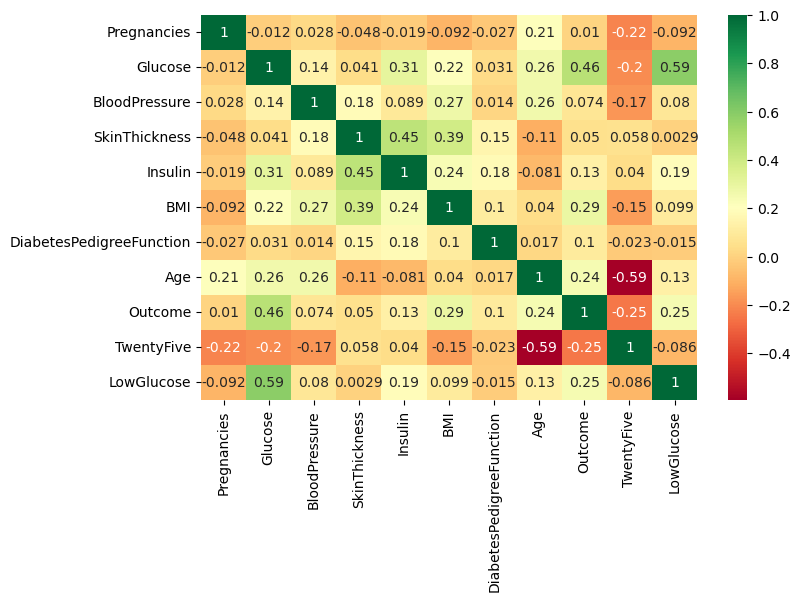

In [746]:
plt.subplots(figsize=(8, 5))
sns.heatmap(data_df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [789]:
data_dt = data_df.copy()

In [810]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'TwentyFive', 'LowGlucose']
x = data_dt[cols]
y = data_dt['Outcome']
tree = DecisionTreeClassifier(random_state=2, max_depth=8)
rfe = RFE(tree, n_features_to_select=9)
rfe = rfe.fit(x, y)
print('Selected features: %s' % list(x.columns[rfe.support_]))

Selected features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'TwentyFive']


In [811]:

Selected_features =  ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'TwentyFive', 'LowGlucose']
x_data = data_dt[Selected_features]
y_data = data_dt['Outcome']


In [812]:
from sklearn.model_selection import cross_val_predict, cross_val_score
import time

start = time.time()
tree.fit(x_data, y_data)
end_tree = time.time() - start
tree_predict = cross_val_predict(tree, x_data, y_data, cv=8)


tree_accuracy = cross_val_score(tree, x_data, y_data, cv=7, scoring='accuracy')
tree_f1 = cross_val_score(tree, x_data, y_data, cv=7, scoring='f1_macro')
tree_recall = cross_val_score(tree, x_data, y_data, cv=7, scoring='recall_macro')
tree_precision = cross_val_score(tree, x, y, cv=7, scoring='precision_macro')
tree_auc = cross_val_score(tree, x, y, cv=7, scoring='roc_auc_ovo')
print('K-fold cross-validation results:')
print(tree.__class__.__name__+" learning rate is %2.3f" % end_tree)
print(tree.__class__.__name__+" average accuracy is %2.3f" % tree_accuracy.mean())
print(tree.__class__.__name__+" average f1 is %2.3f" % tree_f1.mean())
print(tree.__class__.__name__+" average recall is %2.3f" % tree_recall.mean())
print(tree.__class__.__name__+" average precision is %2.3f" % tree_precision.mean())
print(tree.__class__.__name__+" average auc is %2.3f" % tree_auc.mean())

K-fold cross-validation results:
DecisionTreeClassifier learning rate is 0.012
DecisionTreeClassifier average accuracy is 0.918
DecisionTreeClassifier average f1 is 0.906
DecisionTreeClassifier average recall is 0.910
DecisionTreeClassifier average precision is 0.903
DecisionTreeClassifier average auc is 0.965


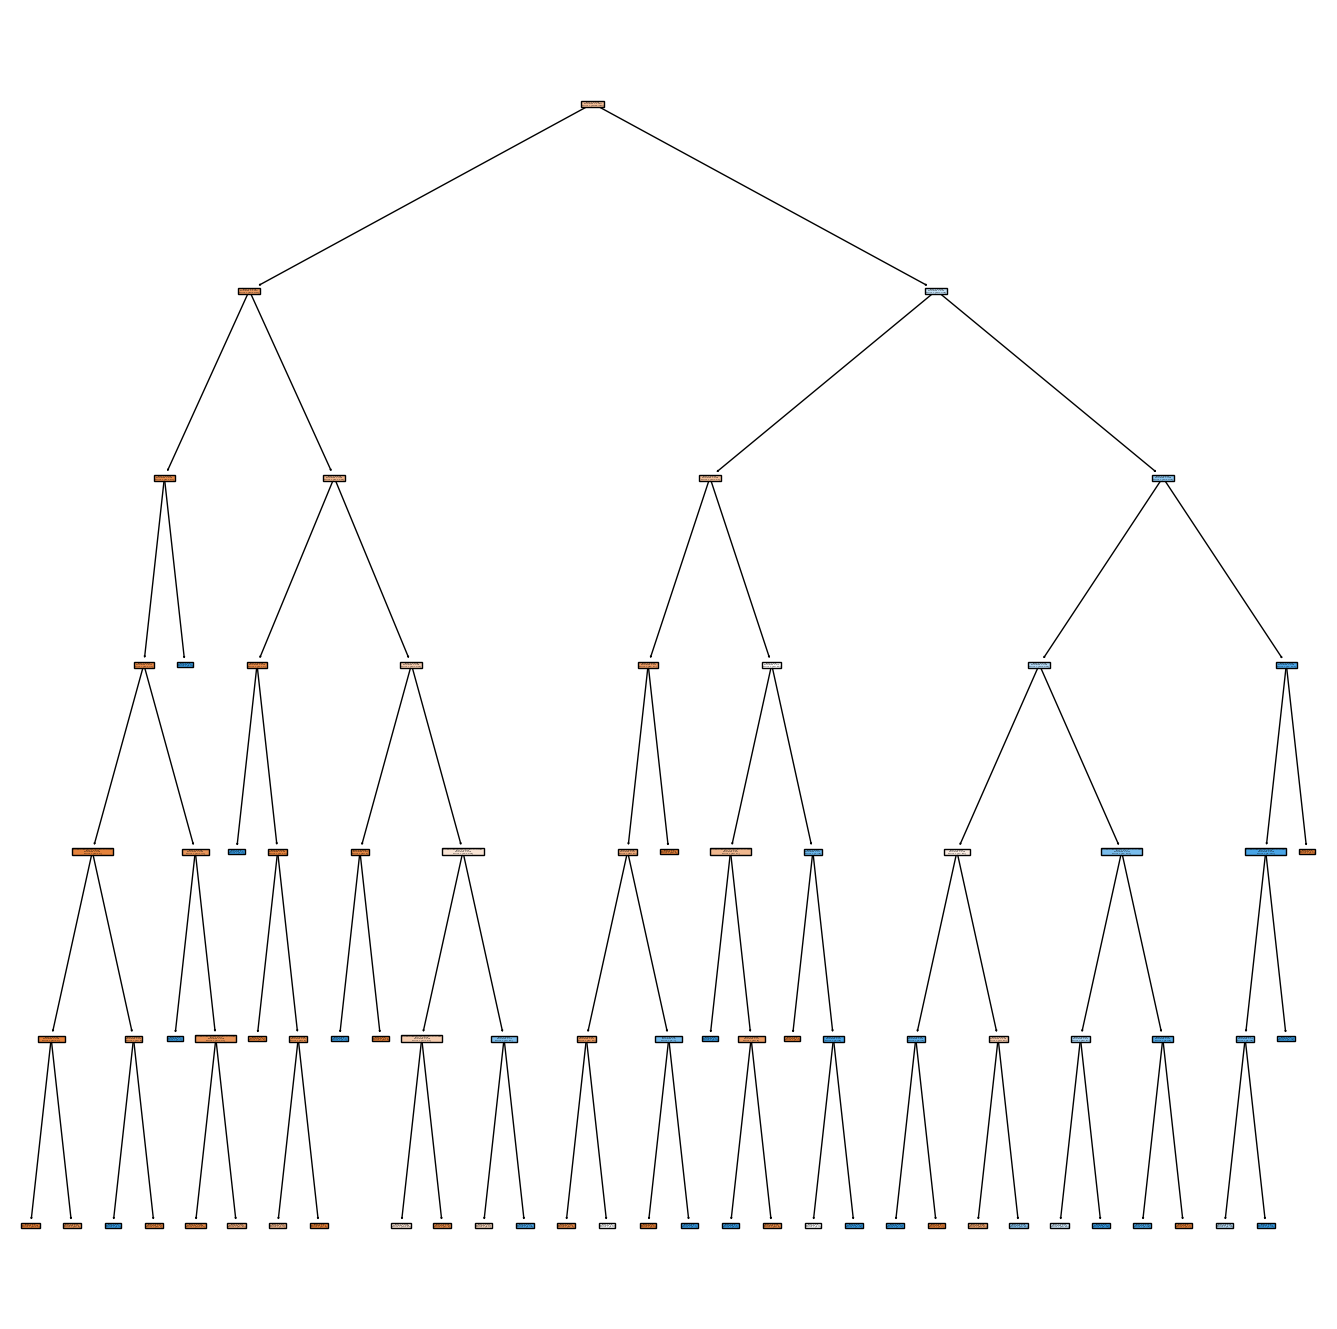

In [800]:
from sklearn.tree import plot_tree
plt.figure(figsize=(17, 17))
plot_tree(tree, feature_names=Selected_features, filled=True);

Text(0.5, 1.0, 'ROC curve')

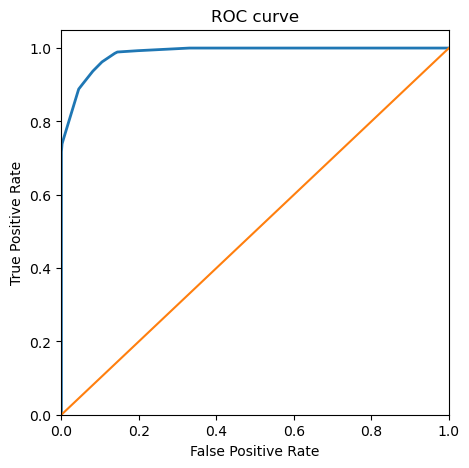

In [813]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

plt.figure(figsize=(5, 5))
[fpr, tpr, thresholds] = roc_curve(y_data, tree.predict_proba(x_data)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [836]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'TwentyFive', 'LowGlucose']
x = data_dt[cols]
y = data_dt['Outcome']
logreg = LogisticRegression()
rfe = RFE(tree, n_features_to_select=7)
rfe = rfe.fit(x, y)
print('Selected features: %s' % list(x.columns[rfe.support_]))

Selected features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [837]:
Selected_features =  ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x_data = data_dt[Selected_features]
y_data = data_dt['Outcome']

In [838]:
start = time.time()
logreg.fit(x_data, y_data)
end_logreg = time.time() - start
logreg_predict = cross_val_predict(logreg, x_data, y_data, cv=5)


logreg_accuracy = cross_val_score(logreg, x_data, y_data, cv=5, scoring='accuracy')
logreg_f1 = cross_val_score(logreg, x_data, y_data, cv=5, scoring='f1_macro')
logreg_recall = cross_val_score(logreg, x_data, y_data, cv=5, scoring='recall_macro')
logreg_precision = cross_val_score(logreg, x_data, y_data, cv=5, scoring='precision_macro')
logreg_auc = cross_val_score(logreg, x_data, y_data, cv=5, scoring='roc_auc_ovo')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" learning rate is %2.3f" % end_logreg)
print(logreg.__class__.__name__+" average accuracy is %2.3f" % logreg_accuracy.mean())
print(logreg.__class__.__name__+" average f1 is %2.3f" % logreg_f1.mean())
print(logreg.__class__.__name__+" average recall is %2.3f" % logreg_recall.mean())
print(logreg.__class__.__name__+" average precision is %2.3f" % logreg_precision.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % logreg_auc.mean())

K-fold cross-validation results:
LogisticRegression learning rate is 0.138
LogisticRegression average accuracy is 0.794
LogisticRegression average f1 is 0.746
LogisticRegression average recall is 0.732
LogisticRegression average precision is 0.778
LogisticRegression average auc is 0.836


Text(0.5, 1.0, 'ROC curve')

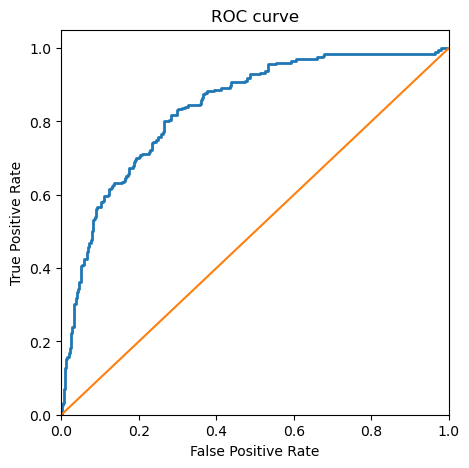

In [839]:
plt.figure(figsize=(5, 5))
[fpr, tpr, thresholds] = roc_curve(y_data, logreg.predict_proba(x_data)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [840]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [841]:
Selected_features =  ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x_data = data_dt[Selected_features]
y_data = data_dt['Outcome']

In [845]:
start = time.time()
classifier.fit(x_data, y_data)
end_gaus = time.time() - start
gaus_predict = cross_val_predict(classifier, x_data, y_data, cv=4)


gaus_accuracy = cross_val_score(classifier, x_data, y_data, cv=4, scoring='accuracy')
gaus_f1 = cross_val_score(classifier, x_data, y_data, cv=4, scoring='f1_macro')
gaus_recall = cross_val_score(classifier, x_data, y_data, cv=4, scoring='recall_macro')
gaus_precision = cross_val_score(classifier, x, y, cv=4, scoring='precision_macro')
gaus_auc = cross_val_score(classifier, x, y, cv=4, scoring='roc_auc_ovo')
print('K-fold cross-validation results:')
print(classifier.__class__.__name__+" learning rate is %2.3f" % end_gaus)
print(classifier.__class__.__name__+" average accuracy is %2.3f" % gaus_accuracy.mean())
print(classifier.__class__.__name__+" average f1 is %2.3f" % gaus_f1.mean())
print(classifier.__class__.__name__+" average recall is %2.3f" % gaus_recall.mean())
print(classifier.__class__.__name__+" average precision is %2.3f" % gaus_precision.mean())
print(classifier.__class__.__name__+" average auc is %2.3f" % gaus_auc.mean())

K-fold cross-validation results:
GaussianNB learning rate is 0.005
GaussianNB average accuracy is 0.768
GaussianNB average f1 is 0.718
GaussianNB average recall is 0.709
GaussianNB average precision is 0.698
GaussianNB average auc is 0.815


Text(0.5, 1.0, 'ROC curve')

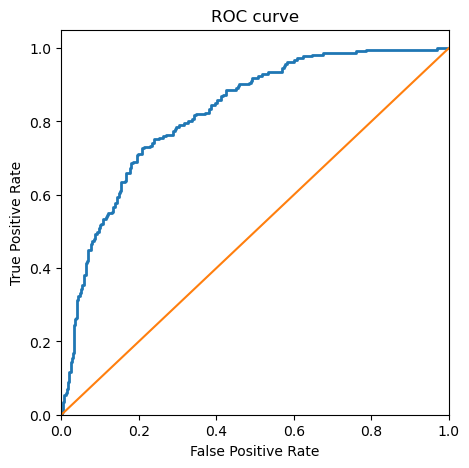

In [847]:
plt.figure(figsize=(5, 5))
[fpr, tpr, thresholds] = roc_curve(y_data, classifier.predict_proba(x_data)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [848]:
effect = pd.DataFrame({'Algorithm': ['Decision tree', 'Logistic regression', 'GaussianNB'], 
                       'Learning rate': [end_tree, end_logreg, end_gaus],
                       'Accuracy': [tree_accuracy.mean(), logreg_accuracy.mean(), gaus_accuracy.mean()],
                       'Precision': [tree_precision.mean(), logreg_precision.mean(), gaus_precision.mean()],
                       'Recall': [tree_recall.mean(), logreg_recall.mean(), gaus_recall.mean()],
                       'F1': [tree_f1.mean(), logreg_f1.mean(), gaus_f1.mean()],
                       'ROC-AUC': [tree_auc.mean(), logreg_auc.mean(), gaus_auc.mean()]})

effect

,Algorithm,Learning rate,Accuracy,Precision,Recall,F1,ROC-AUC
0,Decision tree,0.012372,0.917761,0.902532,0.909903,0.906461,0.965310
1,Logistic regression,0.137555,0.794149,0.777514,0.732057,0.745914,0.836325
2,GaussianNB,0.004501,0.767682,0.698177,0.708821,0.718052,0.815130
